# Interactive Functions 

In [1]:
import pandas as pd
from siuba import _, mutate, count, filter, group_by, ungroup, summarize, show_query, arrange, collect

import numpy as np
from sqlalchemy import create_engine
from siuba.sql import LazyTbl

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [2]:
#! pip install plotnine

In [3]:
from plotnine import *

In [4]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = "{:.2f}".format

In [27]:
## initally read in the clean_obligated_waiting.csv, now reading the df made in the first section 

In [28]:
df = pd.read_csv('gs://calitp-analytics-data/data-analyses/dla/e-76Obligated/function_data.csv', low_memory=False).drop('Unnamed: 0', axis=1)

In [29]:
df.head()

,prefix,project_no,agency,prepared_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,ftip_no,project_location,type_of_work,seq,mpo,prepared_y
0,BPMPL,5904(121),Humboldt County,2018-12-18,0.00,0.00,0.00,Authorized,5904,1,HBPLOCAL,14 Bridges In Humboldt County,Bridge Preventive Maintenance - Deck Joints,3,NON-MPO,2018-01-01
1,ER,32D0(008),Mendocino County,2018-12-17,11508.00,0.00,13000.00,Authorized,5910,1,NaN,"Comptche Ukiah Road, Cr 223 Pm 17.25",Permanent Restoration,3,NON-MPO,2018-01-01
2,ER,4820(004),Humboldt County,2018-12-07,45499.64,0.00,51394.58,Authorized,5904,1,NaN,Mattole Rd Pm 43.17,Permanent Restoration,5,NON-MPO,2018-01-01
3,CML,5924(244),Sacramento County,2018-12-11,207002.00,0.00,247002.00,Authorized,5924,3,SAC25086,Fair Oaks Blvd. Between Howe Ave And Munroe St,Create A Smart Growth Corridor With Barrier Se...,1,SACOG,2018-01-01
4,CML,5924(214),Sacramento County,2018-12-05,0.00,5680921.00,5702041.00,Authorized,5924,3,SAC24753,Florin Rd Between Power Inn Rd. And Florin Per...,Streetscape (tc),3,SACOG,2018-01-01


#### Create new df with no duplicates and without columns with little information


In [30]:
df.duplicated().sum()

8

In [31]:
#after dropping some columns we will have more duplciates due to less information on the df. 

In [33]:
df.loc[df.duplicated(), :]

,prefix,project_no,agency,prepared_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,ftip_no,project_location,type_of_work,seq,mpo,prepared_y
4431,FTAFERPL,6411(009),Sonoma Marin Area Rail Transit District,2017-05-01,3205079.00,0.00,3205079.00,Prog Code RPS9,6411,4,NaN,NaN,FTA Transfer,1,MTC,2017-01-01
7150,FTASTPL,6312(022),Access Services,2016-03-02,6000000.00,0.00,6000000.00,Prog Code M230,6312,7,NaN,NaN,FTA Transfer,1,SCAG,2016-01-01
7151,FTASTPL,6312(022),Access Services,2016-03-02,2300000.00,0.00,2300000.00,Prog Code M230,6312,7,NaN,NaN,FTA Transfer,1,SCAG,2016-01-01
7152,FTASTPL,6312(022),Access Services,2016-03-02,51000000.00,0.00,51000000.00,Prog Code Z230,6312,7,NaN,NaN,FTA Transfer,1,SCAG,2016-01-01
7316,FTASTP,6014(017),San Mateo County Transit District,2015-12-09,305295.00,0.00,305295.00,Prog Code M23E,6014,4,NaN,NaN,FTA Transfer,1,MTC,2015-01-01
7805,FTASTP,6014(017),San Mateo County Transit District,2015-12-09,305295.00,0.00,305295.00,Prog Code M23E,6014,4,NaN,NaN,FTA Transfer,1,MTC,2015-01-01
16220,FTACML,6096(076),San Luis Obispo Council Of Governments,2019-10-07,95000.00,0.00,95000.00,Prog Code Z400,6096,5,NaN,NaN,FTA Transfer,1,SLAC,2019-01-01
16384,FTACML,6045(002),Amador Rapid Transit System,2020-01-13,211130.00,0.00,211130.00,Prog Code M0E3,6045,10,NaN,NaN,FTA Transfer,1,NON-MPO,2020-01-01


* Dropping some columns to have the basic information in the function table

In [20]:
#df = df.drop(['submit__to_hq_date',
        #      'hq_review_date',
         #     'submit_to_fhwa_date',
         #     'to_fmis_date',
         #     'status',
         #     'dist_processing_days',
         #     'hq_processing_days',
         #     'fhwa_processing_days',
         #     'date_request_initiated',
         #     'date_completed_request',
         #     'warning'], axis=1)


In [21]:
#df = df.drop(['location',
            #  'projectID',
            #  'projectNO',
            #  'compare_id_locode'], axis=1)

In [22]:
#cols = ['prepared_date']
#df[cols] = df[cols].applymap(lambda x : pd.to_datetime(x, format = '%Y-%m-%d'))

In [23]:
#df.sample(5)

In [24]:
#df['prepared_y'] = pd.to_datetime(df["prepared_date"].dt.strftime('%Y'))

In [25]:
#df.sample(5)

In [26]:
##creating a new CSV so that the other notebook (for html) does not have to go through these steps
#df.to_csv('function_data.csv')

## Parts of the Function

creating a test function for the creation of the table. Want to be able to filter using the agency and the prefix 

In [6]:
def table_dla(agency=df.agency.unique().tolist(),
             prefix=df.prefix.unique().tolist()):
    display(df[(df.agency == agency)&(df.prefix == prefix)].sample(10))

In [7]:
# we know Humboldt County has many ER obligations, so we will use that to test the function
table_dla(agency='Humboldt County', prefix='ER')

,prefix,project_no,agency,prepared_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,ftip_no,project_location,type_of_work,seq,mpo,prepared_y
16816,ER,4400(012),Humboldt County,2020-07-17,0.00,0.00,0.00,Authorized,5904,1,NaN,Mattole Road -pm 4.37/4.37,Const Stabilization Trench,5,NON-MPO,2020-01-01
1184,ER,20A0(026),Humboldt County,2018-06-25,-1.00,0.00,0.00,Authorized,5904,1,NaN,"Butler Valley Road, Pm 5.22",Storm Damage Restoration,3,NON-MPO,2018-01-01
14884,ER,32L0(121),Humboldt County,2019-09-26,13279.50,-13279.50,0.00,Authorized,5904,1,NaN,Alderpoint Road Pm 36.98,Permanent Restoration,3,NON-MPO,2019-01-01
2008,ER,20A0(025),Humboldt County,2018-03-19,7917.30,0.00,8942.19,Authorized,5904,1,NaN,"Butler Valley Road, Pm 3.7",Permanent Restoration,2,NON-MPO,2018-01-01
735,ER,20A0(007),Humboldt County,2018-08-21,-0.90,0.00,0.00,Authorized,5904,1,NaN,"Alderpoint Road, Pm 7.23",Storm Damage Restoration,5,NON-MPO,2018-01-01
1129,ER,32L0(119),Humboldt County,2018-06-27,22221.00,-22221.00,0.00,Authorized,5904,1,NaN,Mattole Road (f3c010) Pm 6.50,Design Wire Wall Per Geotechnical Investigation,2,NON-MPO,2018-01-01
10766,ER,4400(050),Humboldt County,2014-08-08,1198861.00,0.00,1354130.00,Authorized,5904,1,NaN,Alderpoint Road Pm 42.00 To 42.46,Request For Con/ce,5,NON-MPO,2014-01-01
2016,ER,20A0(038),Humboldt County,2018-03-22,19560.99,0.00,22252.35,Authorized,5904,1,NaN,"Mattole Road, Pm 13.67",Storm Damage Restoration,2,NON-MPO,2018-01-01
17110,ER,4400(017),Humboldt County,2020-09-16,0.00,0.00,0.00,Authorized,5904,1,NaN,Mattole Rd. Pm 17.26,Storm Damage Repair,6,NON-MPO,2020-01-01
13060,ER,32L0(319),Humboldt County,2019-01-10,1823.71,0.00,2060.00,Authorized,5904,1,NaN,In Humboldt County On Mattole Road Pm 5.10,Permanent Restoration,1,NON-MPO,2019-01-01


In [34]:
#making the function interactive

@interact

def table_dla(agency=df.agency.unique().tolist(),
             prefix=df.prefix.unique().tolist()):
    display(df[(df.agency == agency)&(df.prefix == prefix)].sample(10))
    
    

interactive(children=(Dropdown(description='agency', options=('Humboldt County', 'Mendocino County', 'Sacramen…

### Making the graph part of the function

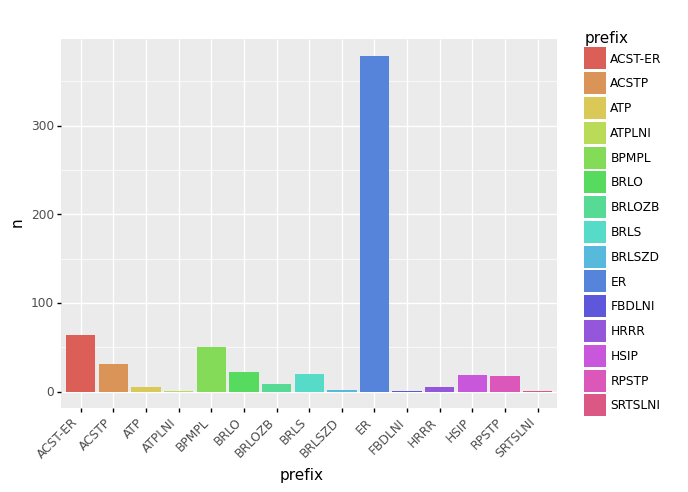

<ggplot: (8738440219606)>

In [35]:
#what we are trying to get using ggplot and Siuba filtering
(df
    >> filter(_.agency.str.contains('Humboldt County'))
    >> count(_.prefix) 
    >> arrange(-_.n)
    >> ggplot(aes("prefix", "n", fill="prefix")) + geom_col() + theme(axis_text_x = element_text(angle = 45 , hjust=1))
)

#### Subsetting a prefix count

using a mix of siuba and pandas for a subset df of our example Humboldt County

In [36]:
agencies = df[df.agency=='Humboldt County']

In [37]:
prefix_count_n = agencies >> count(_.prefix) 

In [38]:
prefix_count_n

,prefix,n
0,ACST-ER,64
1,ACSTP,31
2,ATP,5
3,ATPLNI,1
4,BPMPL,50
5,BRLO,22
6,BRLOZB,9
7,BRLS,20
8,BRLSZD,2
9,ER,379


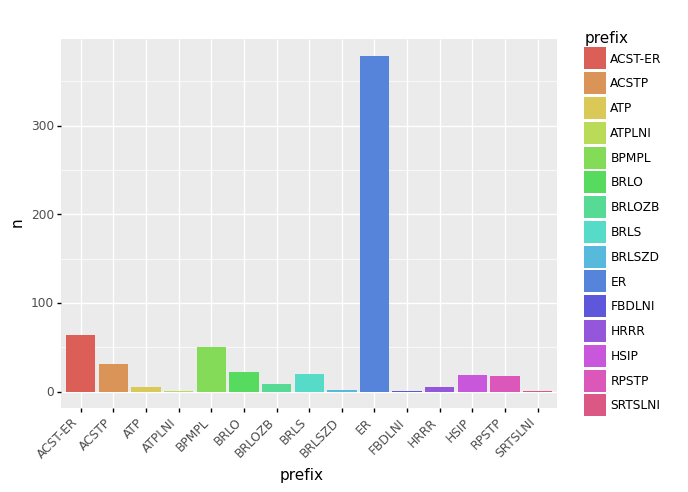

<ggplot: (8738440138710)>

In [39]:

ax1 = (prefix_count_n
        >> ggplot(aes("prefix", "n", fill="prefix")) + geom_col() + theme(axis_text_x = element_text(angle = 45 , hjust=1))
    )
ax1

* great! got the ggplot working with the sub dataframe

### Trying the function now

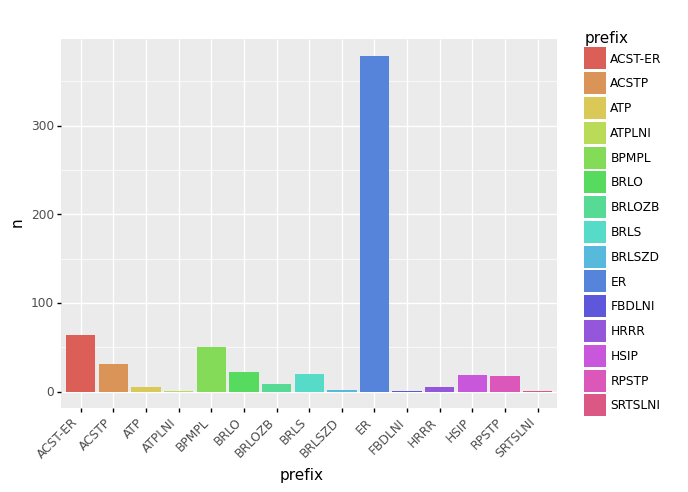

<ggplot: (8738440223877)>

In [40]:
# essentially what we want the function to do in one cell block: 

agencies = df[df.agency=='Humboldt County']
    
prefix_count_n = agencies >> count(_.prefix) 
    
ax1 = (prefix_count_n
        >> ggplot(aes("prefix", "n", fill="prefix")) + geom_col() + theme(axis_text_x = element_text(angle = 45 , hjust=1))
)
ax1


In [41]:
def dla_graphs(place='Humboldt County'):
    
    agencies = df[df.agency==place]
    
    prefix_count_n = agencies >> count(_.prefix) 
    
    ax1 = (prefix_count_n
        >> ggplot(aes("prefix", "n", fill="prefix")) + geom_col() + theme(axis_text_x = element_text(angle = 45 , hjust=1))
    )
    return ax1

                                    
                

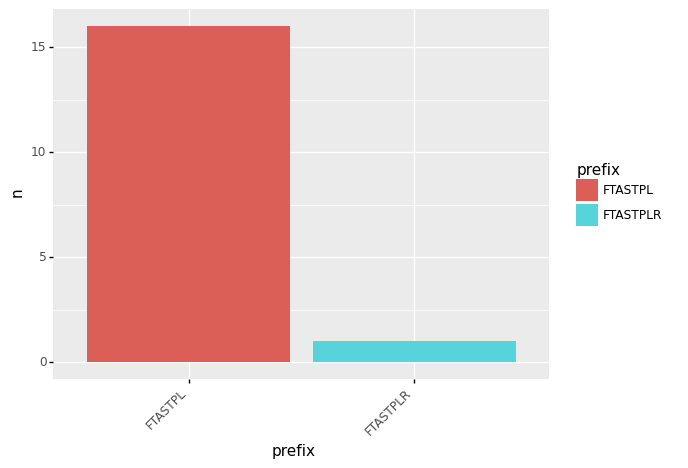

<ggplot: (8738439975397)>

In [42]:
dla_graphs(place='Access Services')

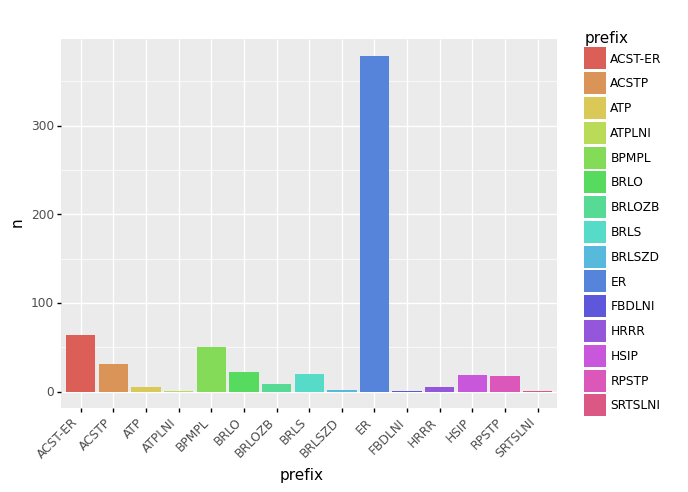

<ggplot: (8738439944033)>

In [43]:
dla_graphs(place='Humboldt County')

In [44]:
#add interact 

@interact
def dla_graphs_prefix(place=df.agency.unique().tolist()):
    
    agencies = df[df.agency==place]
    
    prefix_count_n = agencies >> count(_.prefix) 
    
    ax1 = (prefix_count_n
        >> ggplot(aes("prefix", "n", fill="prefix")) + geom_col() + theme(axis_text_x = element_text(angle = 45 , hjust=1))
    )
    return ax1

                 

interactive(children=(Dropdown(description='place', options=('Humboldt County', 'Mendocino County', 'Sacrament…

* GOT IT. now adding a sample table of some of the data

### Working Function for Agencies

In [45]:
    @interact
    
    def dla_get_prefix(place=df.agency.sort_values().unique().tolist()):
        # for the table- using one as some agencies only have one entry
        display(df[df.agency == place].sample()) 
    
        # graphs 
    
        agencies = df[df.agency==place]
    
        prefix_count_n = agencies >> count(_.prefix) 
    
        ax1 = (prefix_count_n
            >> ggplot(aes("prefix", "n", fill="prefix")) 
               + geom_col() 
               + theme(axis_text_x = element_text(angle = 45 , hjust=1))
               + labs(title='Agency Program Codes', x='Program Codes', y='Number of Obligations', fill="Program Type")
        )
        return ax1

        

interactive(children=(Dropdown(description='place', options=('Access Services', 'Agoura Hills', 'Ala-Con Costa…

##### Exporting to HTML

In [46]:

#from ipywidgets.embed import embed_minimal_html 

In [47]:
#dla_agency_prefix_link = interact(dla_get_prefix)

* might consider using dash https://towardsdatascience.com/dash-for-beginners-create-interactive-python-dashboards-338bfcb6ffa4

## Function for Top Agencies using Prefix

#### getting the table 

In [48]:
df.prefix.sort_values().unique().tolist()

['6140000',
 'ACNHPI',
 'ACST-ER',
 'ACSTP',
 'ASCTP',
 'ATCMTD',
 'ATF5512',
 'ATP',
 'ATPCML',
 'ATPHIPL',
 'ATPHSIP',
 'ATPLN',
 'ATPLNI',
 'ATPLSB1',
 'ATPNIL',
 'ATPSB1',
 'ATPSB1L',
 'ATPSTC',
 'ATPSTCML',
 'ATPSTPL',
 'BDGL',
 'BGFL',
 'BHL',
 'BHLO',
 'BHLOZ',
 'BHLOZD',
 'BHLS',
 'BHLSCR',
 'BHLSP',
 'BHLSZ',
 'BHLSZD',
 'BPMPL',
 'BR',
 'BR-NBISL',
 'BRCMLO',
 'BRHIPL',
 'BRIM',
 'BRL',
 'BRLKS',
 'BRLNS',
 'BRLO',
 'BRLOZ',
 'BRLOZA',
 'BRLOZB',
 'BRLOZE',
 'BRLRT',
 'BRLS',
 'BRLSN',
 'BRLSZ',
 'BRLSZA',
 'BRLSZD',
 'BRLZ',
 'BRNBIF',
 'BRNBISL',
 'BROS',
 'BUILDL',
 'CASB',
 'CFLBRLO',
 'CMAQL',
 'CMESPL',
 'CMFERP',
 'CMFERP16',
 'CMHIPL',
 'CMHPLU',
 'CMHPLULN',
 'CMHRL',
 'CMHSIPL',
 'CML',
 'CMLFSP',
 'CMLFSP18',
 'CMLFTA',
 'CMLG',
 'CMLGNI',
 'CMLHPL',
 'CMLN',
 'CMLNGI',
 'CMLNI',
 'CMLSBCG',
 'CMLSTBGL',
 'CMRPSTPL',
 'CMSTPL',
 'CMSTPLN',
 'CMSTPLNI',
 'CMTCIFL',
 'CMTCIFLN',
 'CMTLSP',
 'CRDL',
 'CRP',
 'CRRSAA',
 'DBF',
 'DBPL02',
 'DE',
 'DEM',
 'DEM04L',
 'DEM

In [49]:
display(df[(df.prefix == 'CML')].sample(10))

,prefix,project_no,agency,prepared_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,ftip_no,project_location,type_of_work,seq,mpo,prepared_y
12169,CML,6447(006),San Francisco Department Of Public Health,2014-03-03,1439000.00,0.00,1439000.00,Authorized,6447,4,SF-130018,In San Francisco,Non-infrastructure Safe Routes To School (tc),1,MTC,2014-01-01
3217,CML,5385(054),Ridgecrest,2017-10-16,0.00,0.00,-27018.68,Authorized,5385,9,KER140520,On Graaf Avenue From N. Sierra View To North N...,Pave A Dirt Road,4,KCOG,2017-01-01
1618,CML,5026(061),San Buena Ventura,2018-04-26,66400.00,0.00,75000.00,Authorized,5026,7,VEN171006,On Wells Road Between Carlos Street And Citrus...,Construct Improvement To The Wells Center Bus ...,1,SCAG,2018-01-01
7074,CML,5392(055),Thousand Oaks,2016-03-16,98600.00,0.00,111375.00,Authorized,5392,7,VEN150616,On Rancho Road Between Thousand Oaks Blvd. And...,Install New Sidewalks On The West Side Of Ranc...,1,SCAG,2016-01-01
8925,CML,5169(040),El Centro,2015-06-12,442149.00,0.00,719556.00,Authorized,NaN,11,IMP120619,Buena Vista Between 6th/8th St.,"Construct Sidewalk, C&g,ada Ramps",2,SCAG,2015-01-01
10496,CML,5091(051),Hanford,2014-10-14,66217.00,0.00,66217.00,Authorized,5091,6,NaN,Grangeville Blvd And 91/4 Ave,Install New Signal (tc),2,KCAG,2014-01-01
11504,CML,5924(214),Sacramento County,2014-06-11,566592.00,0.00,640000.00,Authorized,5924,3,SAC24753,Florin Rd Between Power Inn Rd. And Florin Per...,Streetscape,1,SACOG,2014-01-01
1813,CML,5010(008),Sonora,2018-04-20,-241276.00,0.00,-241276.00,Authorized,5010,10,SONORA-PR,244 S. Shepherd St (apn 002-164-16)/nw Corner ...,"Parking Lot, Utilize As Park & Ride (tc)",3,NON-MPO,2018-01-01
14741,CML,6095(074),Merced County Association Of Governments,2019-07-24,85000.00,0.00,85000.00,Authorized,6095,10,CMAQ17-10,In Merced County,Vanpooling Program (tc),2,MCAG,2019-01-01
17483,CML,5258(042),Chowchilla,2020-10-12,158000.00,0.00,179000.00,Authorized,5258,6,MAD302058,Pedestrian Improvement Project City Of Chowchi...,Pedestrian Improvement Projects,1,MCTC,2020-01-01


In [50]:
def prefix_table_dla(prefix=df.prefix.sort_values().unique().tolist()):
    display(df[(df.prefix == 'CML')].sample(1))


In [51]:
prefix_table_dla(prefix = 'CML')

,prefix,project_no,agency,prepared_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,ftip_no,project_location,type_of_work,seq,mpo,prepared_y
9831,CML,5208(107),Clovis,2015-02-13,0.00,0.00,0.00,Authorized,5208,6,FRE090101,Herndon Ave - Between Willow And Temperance Av...,"Traffic Flow Improvements, Coordinate Signals(tc)",4,CFCG,2015-01-01


#### getting the graph 

In [52]:
prefixes = df[df.prefix== 'CML']

In [53]:

prefix_count = prefixes >> count(_.agency)
    

In [54]:
prefix_count_subset = prefixes.agency.value_counts().iloc[:20].index

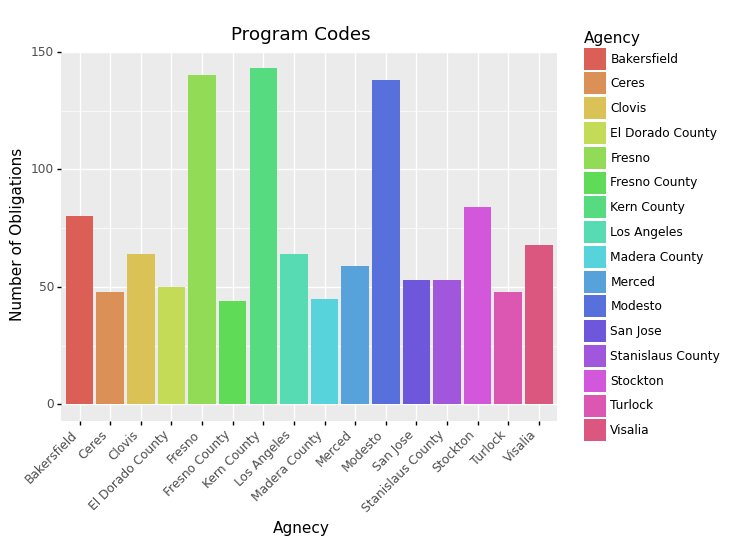

<ggplot: (8738439721933)>

In [55]:
(prefix_count
    >> filter(_.n > 40)
    >> ggplot(aes("agency", "n", fill="agency")) 
        + geom_col() 
        + theme(axis_text_x = element_text(angle = 45 , hjust=1))
        + labs(title='Program Codes', x='Agnecy', y='Number of Obligations', fill="Agency")
)

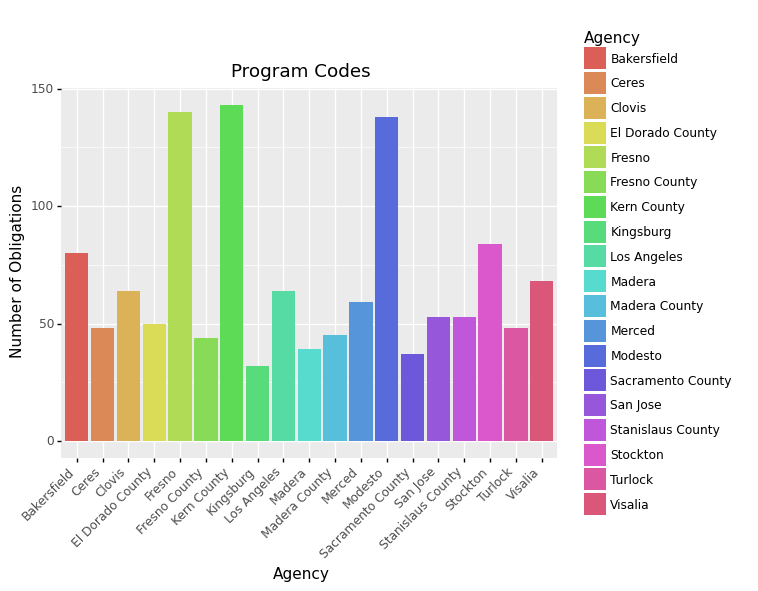

<ggplot: (8738439721969)>

In [56]:
(prefix_count
    >> filter(_.n > 30)
    >> ggplot(aes("agency", "n", fill="agency")) 
        + geom_col() 
        + theme(axis_text_x = element_text(angle = 45 , hjust=1))
        + labs(title='Program Codes', x='Agency', y='Number of Obligations', fill="Agency")
)

,prefix,project_no,agency,prepared_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,ftip_no,project_location,type_of_work,seq,mpo,prepared_y
19594,CML,5942(298),Fresno County,2021-06-30,275948.00,0.00,311700.00,Authorized,5942,6,FRE090130,Goodfellow Avenue From 0.71 Mi E/o Channel Rd ...,Shoulder Improvements: Construct 8-ft Wide Pav...,2,CFCG,2021-01-01


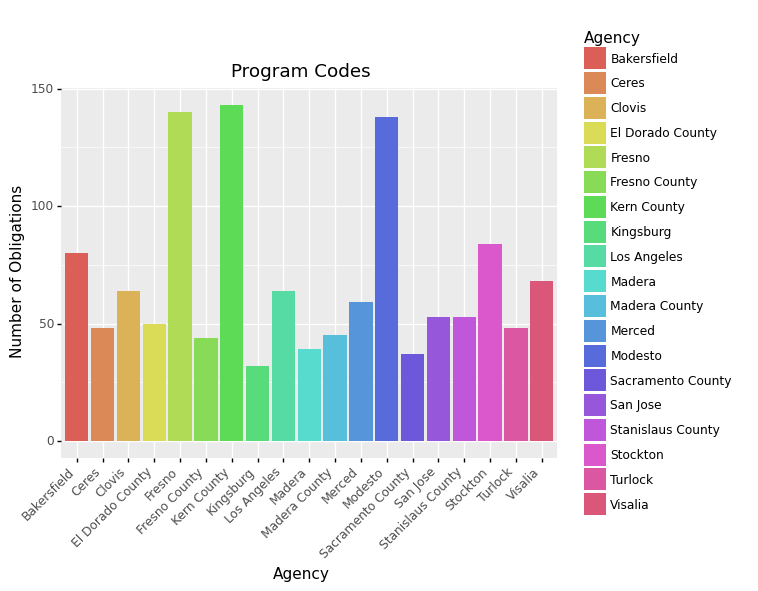

<ggplot: (8738439765104)>

In [57]:
    
display(df[(df.prefix == 'CML')].sample(1))
    
    # graphs 
prefixes = df[df.prefix== 'CML']
    #prefixes = df[df.prefix==prefix]
    
prefix_count = prefixes >> count(_.agency)
    
ax1 = (prefix_count
        >> filter(_.n > 30)
        >> ggplot(aes("agency", "n", fill="agency")) 
            + geom_col() 
            + theme(axis_text_x = element_text(angle = 45 , hjust=1))
            + labs(title='Program Codes', x='Agency', y='Number of Obligations', fill="Agency")
        )    
ax1

### Full Prefix Function

* Still getting an error on the function for programs that do not have more than 20 entries. If we do not limit the number of entries, the chart becomes unreadable

In [58]:
df2 = df.loc[df.prefix.isin(['ATP','CML','STP','HSIP','BRLO','ER','BRLS'])]

In [59]:
@interact
def prefix_agencies(prefix=df2.prefix.sort_values().unique().tolist()):
    # for the table- using one as some agencies only have one entry
    display(df[(df.prefix == prefix)].sample(1))
    
    # graphs 
    prefixes = df[df.prefix== prefix]
    #prefixes = df[df.prefix==prefix]
    
    prefix_count = prefixes >> count(_.agency) >> filter(_.n > 20)
    
    ax1 = (prefix_count
            >> ggplot(aes("agency", "n", fill="agency")) 
                + geom_col() 
                + theme(axis_text_x = element_text(angle = 45 , hjust=1))
                + labs(title='Agencies using Prefix', x='Agency', y='Number of Obligations', fill="Agency")
            )    
    return ax1
              

interactive(children=(Dropdown(description='prefix', options=('ATP', 'BRLO', 'BRLS', 'CML', 'ER', 'HSIP', 'STP…

* Works with prefixes over many agencies. does not work with prefixes that do not have more than 30 agencies

In [60]:
interact(prefix_agencies)

interactive(children=(Dropdown(description='prefix', options=('ATP', 'BRLO', 'BRLS', 'CML', 'ER', 'HSIP', 'STP…

<function __main__.prefix_agencies(prefix=['ATP', 'BRLO', 'BRLS', 'CML', 'ER', 'HSIP', 'STP'])>

* The following function works for all agencies, although it becomes unreadable for the most used prefixes (in the function above).

In [61]:
#function for all agencies
@interact
def prefix_all_agencies(prefix=df.prefix.sort_values().unique().tolist()):
    # for the table- using one as some agencies only have one entry
    display(df[(df.prefix == prefix)].sample(1))
    
    # graphs 
    prefixes = df[df.prefix== prefix]
    #prefixes = df[df.prefix==prefix]
    
    prefix_count = prefixes >> count(_.agency) 
    
    ax1 = (prefix_count
            >> ggplot(aes("agency", "n", fill="agency")) 
                + geom_col() 
                + theme(axis_text_x = element_text(angle = 45 , hjust=1))
                + labs(title='Agencies using Prefix', x='Agency', y='Number of Obligations', fill="Agency")
            )    
    return ax1
              

interactive(children=(Dropdown(description='prefix', options=('6140000', 'ACNHPI', 'ACST-ER', 'ACSTP', 'ASCTP'…

#### Fixing function 
trying to get the top 10 prefix values for each agency if they have more than 30 prefixes

------------------ OR -----------------------

get a list of just the agencies that have more than 10

In [62]:
agency_prefix_count = df['agency'].groupby(df['prefix']).value_counts()

In [63]:
agency_prefix_count.head()


prefix   agency                
6140000  Kern County                2
ACNHPI   Ora Co Trans Au            1
         Sunline Transit Agency     1
ACST-ER  Santa Cruz County         69
         Humboldt County           64
Name: agency, dtype: int64

In [64]:
df >> group_by(_.prefix) >> count (_.agency) 

,prefix,agency,n
0,6140000,Kern County,2
1,ACNHPI,Ora Co Trans Au,1
2,ACNHPI,Sunline Transit Agency,1
3,ACST-ER,Alameda County,2
4,ACST-ER,Benicia,3
...,...,...,...
3189,VPPP,Santa Clara County,1
3190,VPPP,Santa Clara Valley Transportation Authority,2
3191,VPPP,Southern California Association Of Governments,3
3192,VPPTCS,"City & County Of San Francisco, Mta/Parking & ...",1


In [65]:
#https://stackoverflow.com/questions/48590268/pandas-get-the-most-frequent-values-of-a-column/48590361
n = 30
df['prefix'].value_counts()[:n].index.tolist()

['HSIP',
 'CML',
 'STP',
 'ER',
 'BRLO',
 'BRLS',
 'ATP',
 'BPMPL',
 'RPSTP',
 'SRTS',
 'HPLUL',
 'ACSTP',
 'HRRR',
 'FTACML',
 'BHLS',
 'CMLNI',
 'ACST-ER',
 'STPLZ',
 'STPLN',
 'STPCML',
 'FTASTPL',
 'BHLO',
 'BRLSZD',
 'HP21L',
 'SRTSLNI',
 'CMLN',
 'STPLNI',
 'ATPCML',
 'FERPL',
 'BR']

Adding the `[:n]` does not limit the number of entries. 

##### attempt 3

In [66]:
@interact
def prefix_agencies_3(prefix=df.prefix.value_counts()[:50].sort_values().unique().tolist()):
    # for the table- using one as some agencies only have one entry
    display(df[(df.prefix == prefix)].sample(1))
    
    # graphs 
    prefixes = df[df.prefix== prefix]
    #prefixes = df[df.prefix==prefix]
    
    prefix_count = prefixes >> count(_.agency) >> filter(_.n > 20)
    
    ax1 = (prefix_count
            >> ggplot(aes("agency", "n", fill="agency")) 
                + geom_col() 
                + theme(axis_text_x = element_text(angle = 45 , hjust=1))
                + labs(title='Agencies using Prefix', x='Agency', y='Number of Obligations', fill="Agency")
            )    
    return ax1
              

interactive(children=(Dropdown(description='prefix', options=(18, 19, 21, 23, 24, 25, 29, 30, 31, 32, 38, 39, …

##### attempt 4

In [67]:
prefixes = df[df.prefix== 'HSIP']

In [68]:
prefix_count = (prefixes >> count(_.agency) >> arrange(-_.n)).head(5)

In [69]:
prefix_count

,agency,n
251,Stockton,91
121,Los Angeles County,77
120,Los Angeles,75
74,Fresno,63
154,Oakland,55


### Working function for Prefix Codes

In [70]:
@interact
def prefix_all_agencies_4(prefix=df.prefix.sort_values().unique().tolist()):
    # for the table- using one as some agencies only have one entry
    display(df[(df.prefix == prefix)].sample(1))
    
    # graphs 
    prefixes = df[df.prefix== prefix]
    #prefixes = df[df.prefix==prefix]
    
    prefix_count = (prefixes >> count(_.agency) >> arrange(-_.n)).head(10)
    display(prefix_count)
    
    ax1 = (prefix_count
            >> ggplot(aes("agency", "n", fill="agency")) 
                + geom_col() 
                + theme(axis_text_x = element_text(angle = 45 , hjust=1))
                + labs(title='Top 5 Agencies using Prefix', x='Agency', y='Number of Obligations', fill="Agency")
            )    
    return ax1
              

interactive(children=(Dropdown(description='prefix', options=('6140000', 'ACNHPI', 'ACST-ER', 'ACSTP', 'ASCTP'…

## Function for Type of Work

#### Identify which keywords to use

In [71]:
df.type_of_work.nunique()

6882

In [72]:
(df >> count(_.type_of_work) >> arrange(-_.n)).head(50)

,type_of_work,n
592,Bridge Replacement (tc),679
582,Bridge Replacement,519
2014,FTA Transfer,462
3979,Permanent Restoration,282
5289,Road Rehabilitation,269
493,Bridge Preventive Maintenance,175
1781,Emergency Opening,153
3701,Pavement Rehabilitation,120
5667,Seismic Retrofit,119
540,Bridge Rehabilitation,110


In [73]:
#exploring what entries come up with the keywords 
df >> filter(_.type_of_work == 'Pedestrian Improvements')

,prefix,project_no,agency,prepared_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,ftip_no,project_location,type_of_work,seq,mpo,prepared_y
106,CML,5472(019),Windsor,2018-12-10,0.00,0.00,-0.38,Authorized,5472,4,SON130012,Conde Ln/ Johnson Street,Pedestrian Improvements,3,MTC,2018-01-01
303,ATP,5257(033),South Gate,2018-03-01,262000.00,0.00,301000.00,Authorized,5257,7,LAF7612,Long Beach From Santa Ana Street And Tweedy Blvd,Pedestrian Improvements,2,SCAG,2018-01-01
394,CML,5102(042),San Mateo,2018-10-16,0.00,0.00,0.00,Authorized,5102,4,SM-110064,Various Locations South Of Cypress Ave,Pedestrian Improvements,6,MTC,2018-01-01
492,CML,5102(042),San Mateo,2018-07-16,-145840.90,0.00,-144636.92,Authorized,5102,4,SM-110064,Various Locations South Of Cypress Ave,Pedestrian Improvements,5,MTC,2018-01-01
753,CML,5472(019),Windsor,2018-05-14,0.00,0.00,-61193.00,Authorized,5472,4,SON130012,Conde Ln/ Johnson Street,Pedestrian Improvements,2,MTC,2018-01-01
848,DEM08L,5006(719),Los Angeles,2018-07-02,0.00,0.00,0.00,Authorized,5006,7,LA0G686,Highland Park Along Figueroa Between Ave 50 An...,Pedestrian Improvements,3,SCAG,2018-01-01
1471,CML,5254(028),Atwater,2018-05-25,44973.00,0.00,50800.00,Authorized,5254,10,CMAQ17-1,Mitchell Ave Nue (norvel Street To Willow Stre...,Pedestrian Improvements,1,MCAG,2018-01-01
2645,SRTS,5920(133),Sonoma County,2018-01-25,0.00,0.00,0.00,Authorized,5920,4,VAR110012,West Ave. Between Sebastopol Rd. And Hearn Ave.,Pedestrian Improvements,4,MTC,2018-01-01
4138,CML,5006(606),Los Angeles,2017-04-06,2072000.00,0.00,2590000.00,Authorized,5006,7,LAF1615,1st St Between Alameda St And Lorena St.,Pedestrian Improvements,2,SCAG,2017-01-01
4527,ATP,5177(037),South San Francisco,2017-03-29,155000.00,0.00,175082.00,Authorized,5177,4,SM-150015,Linden Ave From California Ave To Miller Ave A...,Pedestrian Improvements,1,MTC,2017-01-01


In [74]:
df >> filter(_.type_of_work == 'Pedestrian Improvements') >> count(_.agency) >> arrange(-_.n)

,agency,n
3,Los Angeles,10
5,San Mateo,5
4,Placer County,4
10,South San Francisco,4
7,Santa Rosa,3
9,South Gate,3
11,Ukiah,3
12,Windsor,3
0,Atwater,2
8,Sonoma County,2


In [75]:
df >> filter(_.type_of_work.str.contains('Pedestrian Improvements')) >> count(_.agency) >> arrange(-_.n)

,agency,n
15,Los Angeles,23
46,Wasco,13
31,San Diego Association Of Governments,7
22,Placer County,6
16,Mcfarland,5
18,Merced County,5
32,San Jose,5
33,San Mateo,5
0,Atwater,4
2,Blue Lake,4


In [76]:
df >> filter(_.type_of_work.str.contains('Pedestrian Improvements'))

,prefix,project_no,agency,prepared_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,ftip_no,project_location,type_of_work,seq,mpo,prepared_y
106,CML,5472(019),Windsor,2018-12-10,0.00,0.00,-0.38,Authorized,5472,4,SON130012,Conde Ln/ Johnson Street,Pedestrian Improvements,3,MTC,2018-01-01
303,ATP,5257(033),South Gate,2018-03-01,262000.00,0.00,301000.00,Authorized,5257,7,LAF7612,Long Beach From Santa Ana Street And Tweedy Blvd,Pedestrian Improvements,2,SCAG,2018-01-01
374,CMSTPL,5924(163),Sacramento County,2018-10-18,0.00,0.00,0.00,Authorized,5924,3,VAR79030,"El Camino Ave: Watt Ave To Mission Ave, Easter...",Bicycle And Pedestrian Improvements,4,SACOG,2018-01-01
394,CML,5102(042),San Mateo,2018-10-16,0.00,0.00,0.00,Authorized,5102,4,SM-110064,Various Locations South Of Cypress Ave,Pedestrian Improvements,6,MTC,2018-01-01
403,STP,5343(008),Mcfarland,2018-10-16,0.00,0.00,27079.12,Authorized,5343,6,KER150401,Frontage Road: N/o Kern Street To Roberstson A...,Landscaping And Pedestrian Improvements.,4,KCOG,2018-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19501,RPSTPLE,5049(025),Ukiah,2021-09-03,-128970.68,0.00,-128970.68,Authorized,5049,1,BIKEPED-A,"State St,perkins St, Standley St, And Henry St...",Pedestrian Improvements,3,NON-MPO,2021-01-01
19659,CML,5230(012),Gustine,2021-06-24,297895.00,0.00,336491.00,Authorized,5230,10,CMAQ21-04,In The City Of Gustine On North Ave (between L...,Pedestrian Improvements - Walkway,2,MCAG,2021-01-01
19767,RPSTPLE,5006(689),Los Angeles,2017-06-22,141575.00,0.00,-123024.00,WAITING FOR FINAL PAYABLE INVOICE FROM DISTRIC...,5006,7,LA11G2T,West Third Street: La Cienega/fairfax,Pedestrian Improvements,4,SCAG,2017-01-01
19904,HSIP,5177(043),South San Francisco,2021-08-31,204800.00,0.00,205500.00,..,5177,4,NaN,3 Intersections. W. Orange Ave & Canal St. W. ...,Pedestrian Improvements,1,MTC,2021-01-01


#### Creating a list of the top 50 types of projects


In [77]:
top50 = (df >> count(_.type_of_work) >> arrange(-_.n)).head(50)

In [78]:
top50.head()

,type_of_work,n
592,Bridge Replacement (tc),679
582,Bridge Replacement,519
2014,FTA Transfer,462
3979,Permanent Restoration,282
5289,Road Rehabilitation,269


In [79]:
top50list = top50.type_of_work.sort_values().unique().tolist()

In [80]:
display(df[(df.type_of_work == 'FTA Transfer')].sample(1))

,prefix,project_no,agency,prepared_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,ftip_no,project_location,type_of_work,seq,mpo,prepared_y
8719,FTACML,5953(721),Los Angeles County,2015-07-09,1274000.00,0.00,1274000.00,Prog Code M003,5953,7,NaN,NaN,FTA Transfer,1,SCAG,2015-01-01


### Full Type of Work Function 

In [81]:
@interact
def findtypeofwork(work=top50list):
    
    # graphs 
    worktypes = df[df.type_of_work== work]
    
    work_count = (worktypes >> count(_.agency) >> arrange(-_.n)).head(10)
    display(work_count)

    ax1 = (work_count
            >> ggplot(aes("agency", "n", fill="agency")) 
                + geom_col() 
                + theme(axis_text_x = element_text(angle = 45 , hjust=1))
                + labs(title='Agencies using Type of Work', x='Agency', y='Number of Obligations', fill="Agency")
            )    
    return ax1

interactive(children=(Dropdown(description='work', options=('Ac Overlay', 'Ac Overlay (tc)', 'Asphalt Concrete…

## Function for samples of data

In [82]:
df.sample()

,prefix,project_no,agency,prepared_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,ftip_no,project_location,type_of_work,seq,mpo,prepared_y
8793,HSIP,5473(016),Truckee,2015-06-23,738000.00,0.00,820000.00,Authorized,5473,3,HSIP_RURL,"Glenshire Dr. From 1,500' W Of Highlands Ave. ...",Widen Shoulders Incl. Bike Lanes & Improve Ver...,3,NON-MPO,2015-01-01


In [83]:
#filtering data so we have it on one line

In [84]:
df_query = df[['prefix', 'agency', 'project_no','locode','dist','fed_requested', 'ac_requested', 'total_requested',
              'type_of_work','project_location', 'seq', 'mpo','prepared_y']]

In [85]:
df_query.sample()

,prefix,agency,project_no,locode,dist,fed_requested,ac_requested,total_requested,type_of_work,project_location,seq,mpo,prepared_y
16429,SRTS,"City & County Of San Francisco, Mta/Parking & ...",6328(051),6328,4,0.00,0.00,0.00,Srts - Safety Improvements,Turk St Between Sr 101 And Polk St,4,MTC,2020-01-01


### Agency and Prefix

In [86]:
@interact
def get_query1(agency=df_query.agency.unique().tolist(),
             prefix=df_query.prefix.unique().tolist()):
    
    filtering = df_query[(df_query.agency==agency)&(df_query.prefix==prefix)]
    
    
    print("The number of obligations this agency has in this prefix is", len(filtering))
    
    display(filtering.head())
    
    

interactive(children=(Dropdown(description='agency', options=('Humboldt County', 'Mendocino County', 'Sacramen…

### Agency, Prefix and Year

In [87]:
#adding year
@interact
def get_query2(agency=df_query.agency.unique().tolist(),
             prefix=df_query.prefix.unique().tolist(),
             year=df_query.prepared_y.unique().tolist()):
    
    filtering = df_query[(df_query.agency==agency)&(df_query.prefix==prefix)&(df_query.prepared_y==year)]
    
    
    print("The number of obligations this agency has in this prefix and year is", len(filtering))
    
    display(filtering.head())
    
    

interactive(children=(Dropdown(description='agency', options=('Humboldt County', 'Mendocino County', 'Sacramen…

### Work type by year and agency

In [88]:
#substitute prefix for type_of_work
@interact
def get_query3(agency=df_query.agency.unique().tolist(),
             worktype=top50list):
    
    filtering = df_query[(df_query.agency==agency)&(df_query.type_of_work==worktype)]
    
    
   # print("The number of obligations this agency has in this type of work and year is", len(filtering))
    
    
    print(
        "-----Number of obligations grouped by Type of Work-----")
    
    top_counts = (df_query >> filter(_.agency==agency) >> group_by(_.prepared_y) >> count(_.type_of_work) 
           >> arrange(-_.n))
    display(top_counts.head(20))

    

interactive(children=(Dropdown(description='agency', options=('Humboldt County', 'Mendocino County', 'Sacramen…